In [1]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
from natsort import natsorted
import matplotlib.pyplot as plt

# Set the directory where the XML files are located
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/data")

# Get a list of the XML files in the directory
xml_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(".xml")]

# Initialize an empty dictionary to hold the RNAexpression data
rna_expression_data = {}
cell_lineage = {}

# Loop through each XML file
for xml_file in xml_files:

    # Parse the XML file
    tree = ET.parse(xml_file)

    # Get the root element of the XML file
    root = tree.getroot()

    # Find the tag wih the desired expression level entries
    rna_expression = root.find("./entry/rnaExpression[@assayType='immuneCell']")
    
    # Loop through each data child tag of the rnaExpression tag
    for data in rna_expression.iter("data"):
        # Get the name of the tissue type
        cellName = data.find('immuneCell').text
        # Get the lineage name for organization
        lineageName = data.find('immuneCell').get('lineage')
        # Get the nTPM value from tissue type
        expRNA_value = data.find("./level[@type='normalizedRNAExpression']").get('expRNA')
        expRNA_value = float(expRNA_value)
        # Add the tag name and value to the dictionary
        if cellName not in rna_expression_data:
            rna_expression_data[cellName] = expRNA_value
            cell_lineage[cellName] = lineageName
        else: raise Exception('a tissue type was found twice')

    # Convert the dictionary to a Pandas dataframe
    protName = root.find('entry').find('name').text
    try:
        rna_expression_df[protName] = rna_expression_data
    except NameError:
        rna_expression_df = pd.DataFrame.from_dict(rna_expression_data, orient='index', columns=[protName])
        rna_expression_df['lineage'] = cell_lineage
    # Empty the dict before the new file
    rna_expression_data = {}


# Sort the cols alphabetically
order = natsorted(list(rna_expression_df.columns))
rna_expression_df = rna_expression_df.reindex(order, axis=1)
# sort the rows according to lineagetype
rna_expression_df = rna_expression_df.sort_values('lineage', axis=0)
# Save the resulting dataframe
rna_expression_df.to_csv(f'{directory}/tissueProtTable.csv')
rna_expression_df

,ICMT,PLEK,RCE1,SPTLC1,SPTLC2,SPTSSA,ZDHHC1,ZDHHC2,ZDHHC3,ZDHHC4,...,ZDHHC16,ZDHHC17,ZDHHC18,ZDHHC19,ZDHHC20,ZDHHC21,ZDHHC22,ZDHHC23,ZDHHC24,lineage
Naive B-cell,1.8,103.6,12.0,15.5,7.9,7.1,0.0,2.1,12.6,36.0,...,10.6,3.9,0.3,2.4,3.4,1.4,0.0,0.3,7.5,B-cells
Memory B-cell,1.1,157.7,15.3,15.4,6.7,8.3,0.0,2.5,10.7,38.8,...,9.0,2.5,0.4,2.5,4.6,2.0,0.0,0.5,6.4,B-cells
Myeloid DC,1.7,229.6,18.9,30.6,31.2,19.6,0.8,1.1,26.8,28.1,...,15.7,2.8,0.8,0.0,8.4,0.0,0.0,0.0,7.2,Dendritic cells
Plasmacytoid DC,2.7,474.8,29.1,18.4,11.1,7.0,0.0,2.3,15.3,113.9,...,12.0,17.1,0.4,0.0,4.1,0.5,0.0,0.2,23.1,Dendritic cells
Neutrophil,0.6,573.9,7.2,33.3,19.1,2.0,0.1,0.9,25.4,2.9,...,0.5,5.9,48.8,1.5,3.0,0.0,0.0,0.1,2.2,Granulocytes
Basophil,2.6,231.9,23.1,32.4,18.3,21.5,0.0,1.6,53.7,56.3,...,0.3,6.2,0.0,0.0,12.6,0.2,0.0,0.0,3.0,Granulocytes
Eosinophil,1.6,429.2,14.6,20.2,27.1,4.9,0.0,2.6,32.6,44.8,...,11.1,5.7,10.0,1.2,3.8,0.0,0.0,0.0,1.0,Granulocytes
Intermediate monocyte,2.2,351.6,24.0,36.1,24.2,29.9,1.4,1.3,12.3,31.9,...,11.9,2.4,1.1,0.0,14.9,0.3,0.0,0.0,5.7,Monocytes
Non-classical monocyte,1.9,390.8,21.5,34.2,31.8,25.5,1.3,0.8,17.5,26.5,...,11.8,2.5,0.8,0.0,13.8,0.2,0.0,0.0,5.0,Monocytes
Classical monocyte,1.9,297.5,21.1,33.1,31.3,36.9,1.0,1.2,24.5,25.0,...,11.1,2.3,0.5,0.0,16.2,0.1,0.0,0.0,5.9,Monocytes


In [16]:
'''
Split the df in two parts, rename the ZDHHC columns in one of them.
'''
rna_expression_df1 = rna_expression_df.iloc[:,:6]
rna_expression_df1['ZDHHC17'] = rna_expression_df['ZDHHC17']
rna_expression_PLEK = pd.DataFrame(rna_expression_df1.pop('PLEK'))

rna_expression_df_zinc = rna_expression_df.iloc[:,6:-1]
newNames = {}
for n in list(rna_expression_df_zinc.columns):
    nn = n[5:]
    newNames[n] = nn
rna_expression_df_zinc = rna_expression_df_zinc.rename(newNames, axis=1)


In [17]:
rna_expression_PLEK

,PLEK
Naive B-cell,103.6
Memory B-cell,157.7
Myeloid DC,229.6
Plasmacytoid DC,474.8
Neutrophil,573.9
Basophil,231.9
Eosinophil,429.2
Intermediate monocyte,351.6
Non-classical monocyte,390.8
Classical monocyte,297.5


AttributeError: 'Colorbar' object has no attribute 'ax2'

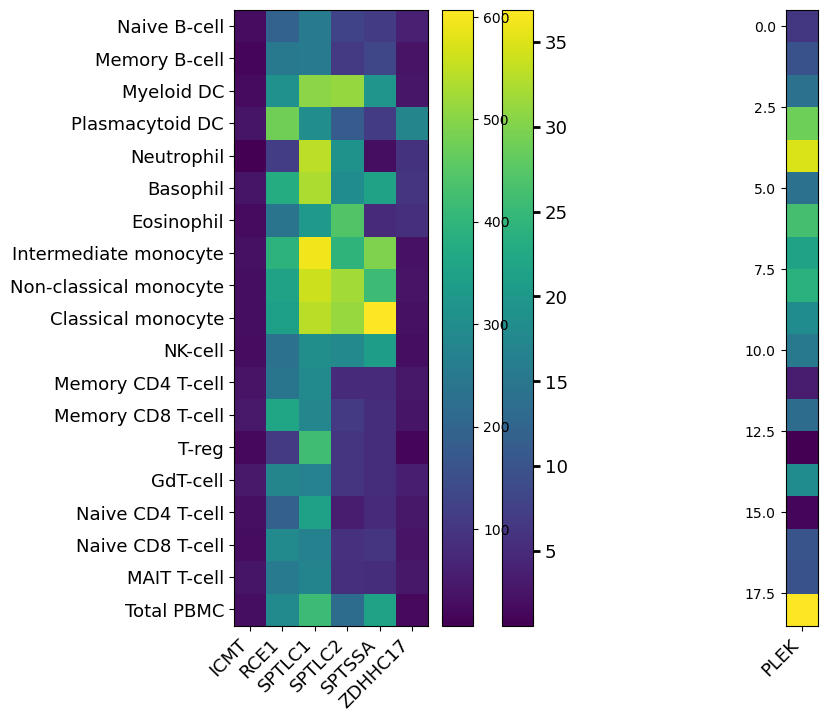

In [18]:
# Create the heatmap using matplotlib
fig, [ax, ax2] = plt.subplots(1, 2, figsize=(10, 8))
df = rna_expression_df1
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)

df = rna_expression_PLEK
im = ax2.imshow(df, cmap='viridis')
ax2.set_xticks(range(len(df.columns)))
ax2.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
cbar = ax2.figure.colorbar(im, ax=ax)
cbar.ax2.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
plt.title('Heatmap of main proteins of interest gene expr / immune cell types', fontsize=15)

# Show/Save the plot
plt.show()
# directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
# fig.savefig(f'{directory}/plots/mainProts.pdf')
